# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\PMLS\ML\lab11\New folder\train'
validation_dir = r'C:\Users\PMLS\ML\lab11\New folder\validation'
test_dir = r'C:\Users\PMLS\ML\lab11\New folder\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

C:\Users\PMLS\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']  # use 'accuracy' instead of 'acc' for clarity
)

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [11]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20,
                    callbacks=callbacks)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8456 - loss: 0.3720  
Epoch 1: val_loss improved from 0.43476 to 0.34725, saving model to C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-0001-loss0.35.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8454 - loss: 0.3719 - val_accuracy: 0.8373 - val_loss: 0.3473
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8446 - loss: 0.3331  
Epoch 2: val_loss improved from 0.34725 to 0.31365, saving model to C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-0002-loss0.31.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8446 - loss: 0.3328 - val_accuracy: 0.8294 - val_loss: 0.3136
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8458 - loss: 0.3380  
Epoch 3: val_loss did not improve from 0.31365
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8461 - loss: 0.3375 - val_accuracy: 0.8016 - val_loss: 0.4028
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8733 - loss: 0.2851  
Epoch 4: val_loss improved from 0.31365 to 0.30700, saving model to C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-0004-loss0.31.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8735 - loss: 0.2846 - val_accuracy: 0.8571 - val_loss: 0.3070
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8926 - loss: 0.2561  
Epoch 5: val_loss improved from 0.30700 to 0.24512, saving model to C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-0005-loss0.25.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8926 - loss: 0.2561 - val_accuracy: 0.8849 - val_loss: 0.2451
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9129 - loss: 0.2012  
Epoch 6: val_loss did not improve from 0.24512
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9128 - loss: 0.2012 - val_accuracy: 0.8611 - val_loss: 0.2935
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9181 - loss: 0.1948  
Epoch 7: val_loss improved from 0.24512 to 0.23563, saving model to C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-0007-loss0.24.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9180 - loss: 0.1952 - val_accuracy: 0.8849 - val_loss: 0.2356
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9328 - loss: 0.1762  
Epoch 8: val_loss improved from 0.23563 to 0.21005, saving model to C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-0008-loss0.21.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9327 - loss: 0.1763 - val_accuracy: 0.9048 - val_loss: 0.2100
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9335 - loss: 0.1687  
Epoch 9: val_loss did not improve from 0.21005
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9333 - loss: 0.1688 - val_accuracy: 0.9008 - val_loss: 0.2297
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9425 - loss: 0.1516  
Epoch 10: val_loss did not improve from 0.21005
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9424 - loss: 0.1518 - val_accuracy: 0.7897 - val_loss: 0.5483
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9447 - loss: 0.1297  
Epoch 11: val_loss did not improve from 0.21005
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9445 - loss: 0.1302 - val_accuracy: 0.8810 - val_loss: 0.2571
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9549 - loss: 0.1145  
Epoch 12: val_loss improved from 0.21005 to 0.20489, s

50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9548 - loss: 0.1148 - val_accuracy: 0.9127 - val_loss: 0.2049
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9555 - loss: 0.1192  
Epoch 13: val_loss did not improve from 0.20489
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9555 - loss: 0.1192 - val_accuracy: 0.8690 - val_loss: 0.3207
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9556 - loss: 0.1098  
Epoch 14: val_loss did not improve from 0.20489
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9558 - loss: 0.1099 - val_accuracy: 0.9008 - val_loss: 0.2121
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9543 - loss: 0.1172  
Epoch 15: val_loss did not improve from 0.20489
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9545 - loss: 0.1169 - val_accuracy: 0.8968 - val_loss: 0.2350
Epoch 16/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9677 - loss: 0.0917  
Epoch 16: val_loss did not improve from 0.20489
50/5

In [12]:
model_history.history

{'accuracy': [0.8374999761581421,
  0.8487499952316284,
  0.8618749976158142,
  0.8856250047683716,
  0.8893749713897705,
  0.9100000262260437,
  0.9100000262260437,
  0.9256250262260437,
  0.9256250262260437,
  0.940625011920929,
  0.9318749904632568,
  0.949999988079071,
  0.9587500095367432,
  0.9612500071525574,
  0.9637500047683716,
  0.9581249952316284,
  0.9649999737739563,
  0.9668750166893005,
  0.9856250286102295,
  0.9793750047683716],
 'loss': [0.3696766197681427,
  0.321211040019989,
  0.310538649559021,
  0.26074835658073425,
  0.25312092900276184,
  0.20518596470355988,
  0.21280506253242493,
  0.18396463990211487,
  0.17460358142852783,
  0.1591784507036209,
  0.1534203439950943,
  0.127113938331604,
  0.11985532939434052,
  0.11091151088476181,
  0.10262738168239594,
  0.11022283881902695,
  0.08737190067768097,
  0.09061483293771744,
  0.06088690832257271,
  0.061604004353284836],
 'val_accuracy': [0.8373016119003296,
  0.829365074634552,
  0.8015872836112976,
  0.857

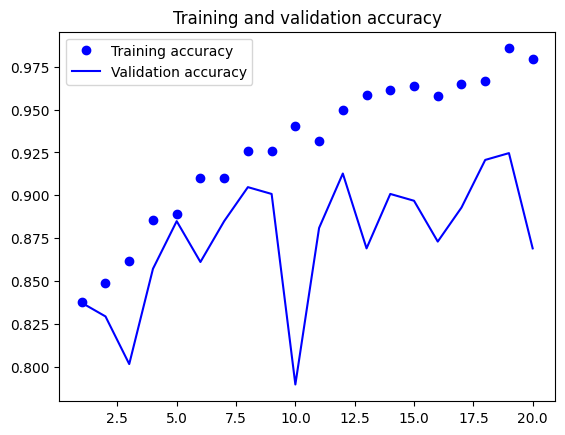

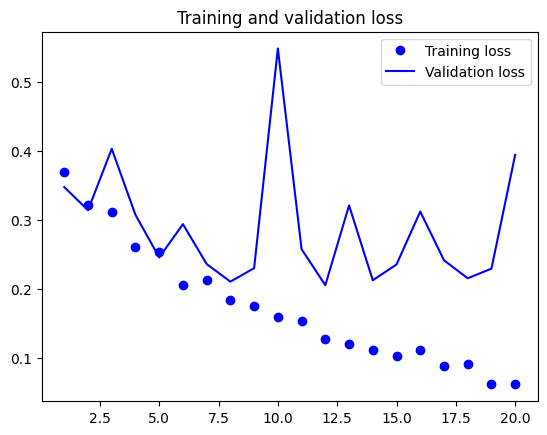

<Figure size 640x480 with 0 Axes>

In [14]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Save the last figure (loss plot)
plt.savefig(r'C:\Users\PMLS\ML\lab12\model_Accuracy.png')


In [16]:
model.save(r'C:\Users\PMLS\ML\lab12\final_model.h5')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step


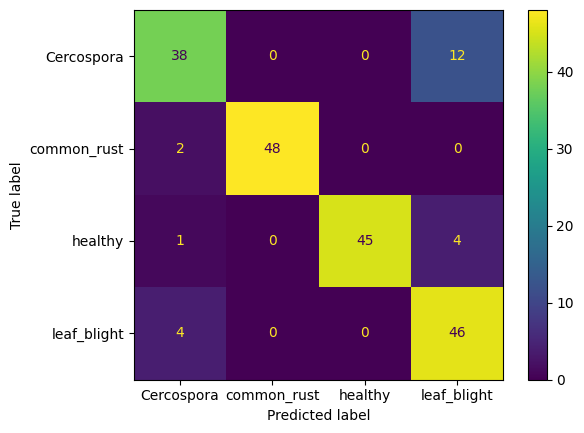

In [17]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [18]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.84      0.76      0.80        50
 common_rust       1.00      0.96      0.98        50
     healthy       1.00      0.90      0.95        50
 leaf_blight       0.74      0.92      0.82        50

    accuracy                           0.89       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200

